In [75]:
%matplotlib inline
from __future__ import print_function
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical
from scipy import misc
import numpy as np
from skimage import color
from skimage.color import rgb2gray
from os import listdir
from os.path import isfile
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Data

# input image dimensions
img_rows, img_cols = 128, 128
img_channels = 1

#Create main image array

brick_stack = np.zeros([img_rows,img_cols])
labels_text = []

#List folders in the root directory
root_path = '/Users/ckruse/Documents/Python/LegoModel/Bricks/'
root_folders = listdir(root_path)

#Load images into image_array by iterating through all the folders in the root directory
num_img = 0
for folder in root_folders:
    if isfile(folder) == False:
        folder_files = listdir("%s%s" % (root_path, folder))
        num_img += len(folder_files)


print(num_img)
images = np.zeros((num_img,img_rows,img_cols))
i = 0
for folder in root_folders:
    if isfile(folder) == False:
        print(folder)
        folder_files = listdir("%s%s" % (root_path, folder))
        for brick in folder_files:
            img = cv2.imread("%s%s/%s" % (root_path, folder, brick))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images[i,:,:] = img
            labels_text.append(folder)
            i += 1

print(images.shape)

13341
11212
2445
30008
3020
3021
3023
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3456
3460
3623
3666
3710
3795
3832
3958
41539
4282
4477
(13341, 128, 128)


In [76]:
# Transform text labels from folder names into categorical labels to be
# used for the categorical_crossentropy objective

le = preprocessing.LabelEncoder()
le.fit(labels_text)
int_labels = le.transform(labels_text)
categorical_labels = to_categorical(int_labels, nb_classes=None)

print(categorical_labels.shape)
print(images.shape)
# To get the text label back out, use `le.inverse_transform(3)`

(13341, 27)
(13341, 128, 128)


In [84]:
# Split training and validation datasets
import sklearn
from sklearn.model_selection import train_test_split
images_dim = np.expand_dims(images, axis=3)

X_train, X_val, Y_train, Y_val = train_test_split(images_dim,categorical_labels, 
                                                  test_size=0.1, random_state=12)

X_train = X_train.astype('float32')
X_train /= 255
X_val = X_val.astype('float32')
X_val /= 255

print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'test samples')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_val shape:', X_val.shape)
print('Y_val shape:', Y_val.shape)
print('Max Val of Train X', np.max(X_train[0]))
plt.imshow(X_train[1,:,:,0])
plt.show()

12006 train samples
1335 test samples
X_train shape: (12006, 128, 128, 1)
Y_train shape: (12006, 27)
X_val shape: (1335, 128, 128, 1)
Y_val shape: (1335, 27)
Max Val of Train X 0.886275


In [92]:
#Model Parameters and Training
import tensorflow as tf

tf.python.control_flow_ops = tf
batch_size = 64
nb_classes = categorical_labels.shape[1]
nb_epoch = 1

model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='valid',
                        input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='valid'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




# Optional Model Weight Loading
model.load_weights('/Users/ckruse/Documents/Python/LegoModel/model/keras_model_128px_white.h5')

model.fit(X_train, Y_train,
            batch_size=batch_size,
            nb_epoch=nb_epoch,
            verbose=1,
            show_accuracy=True,
            validation_split = 0.1,
#            validation_data=(X_val, Y_val),
            shuffle=True)


Train on 10805 samples, validate on 1201 samples
Epoch 1/1
10805/10805 [==============================] - 714s - loss: 1.6925 - acc: 0.4558 - val_loss: 1.5329 - val_acc: 0.4996


In [93]:
# Save Model
from keras.models import load_model
model.save('/Users/ckruse/Documents/Python/LegoModel/model/keras_model_128px_white.h5')
model.save_weights('/Users/ckruse/Documents/Python/LegoModel/model/keras_model_128px_white.h5')

(50,)
True Block ID:  [['3033']]
Predicted Block ID:  3028
Confidence:  0.26816


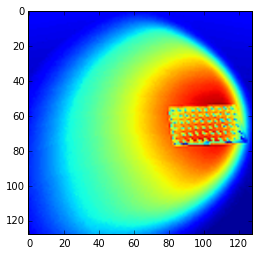

True Block ID:  [['3666']]
Predicted Block ID:  3666
Confidence:  0.490101


True Block ID:  [['2445']]
Predicted Block ID:  3832
Confidence:  0.407558


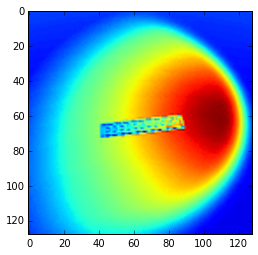

True Block ID:  [['30008']]
Predicted Block ID:  30008
Confidence:  0.724332


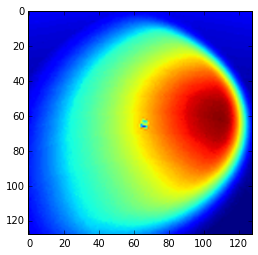

True Block ID:  [['41539']]
Predicted Block ID:  41539
Confidence:  0.830184


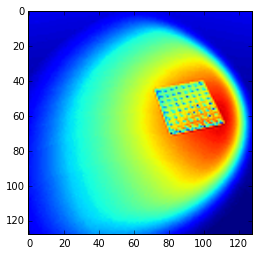

True Block ID:  [['3030']]
Predicted Block ID:  3030
Confidence:  0.45433


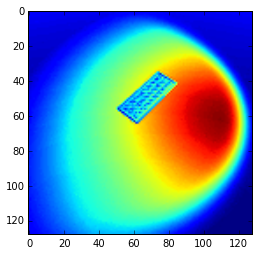

True Block ID:  [['3029']]
Predicted Block ID:  3029
Confidence:  0.2851


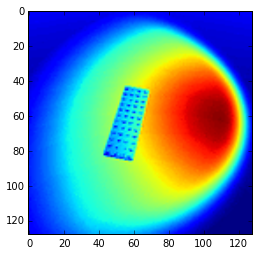

True Block ID:  [['3666']]
Predicted Block ID:  3666
Confidence:  0.38131


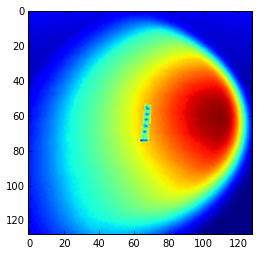

True Block ID:  [['3027']]
Predicted Block ID:  3027
Confidence:  0.660726


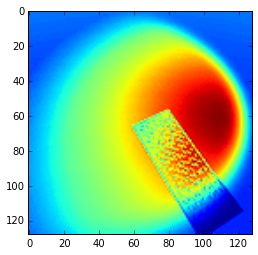

True Block ID:  [['3623']]
Predicted Block ID:  3623
Confidence:  0.486103


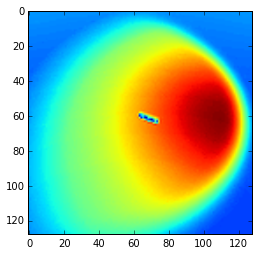

True Block ID:  [['2445']]
Predicted Block ID:  3832
Confidence:  0.491165


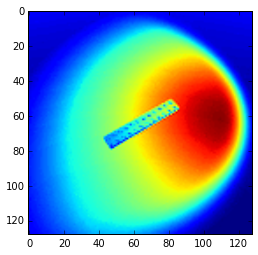

True Block ID:  [['3958']]
Predicted Block ID:  3958
Confidence:  0.309122


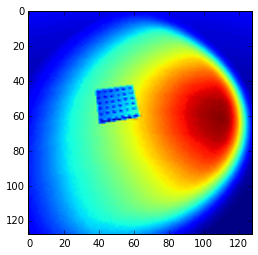

True Block ID:  [['4282']]
Predicted Block ID:  4282
Confidence:  0.819309


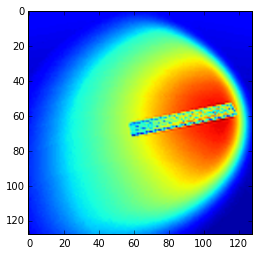

True Block ID:  [['3035']]
Predicted Block ID:  3032
Confidence:  0.33773


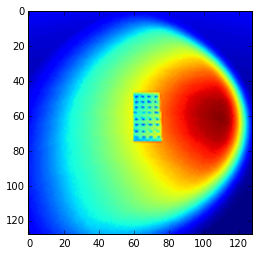

True Block ID:  [['3034']]
Predicted Block ID:  3034
Confidence:  0.18857


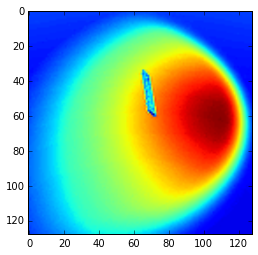

True Block ID:  [['3035']]
Predicted Block ID:  3035
Confidence:  0.35765


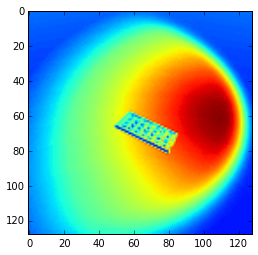

True Block ID:  [['3036']]
Predicted Block ID:  3036
Confidence:  0.197616


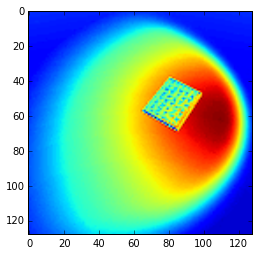

True Block ID:  [['3032']]
Predicted Block ID:  3795
Confidence:  0.204106


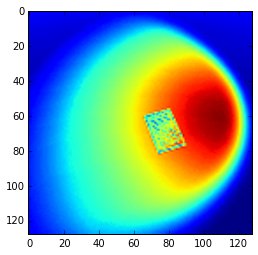

True Block ID:  [['3958']]
Predicted Block ID:  3032
Confidence:  0.204007


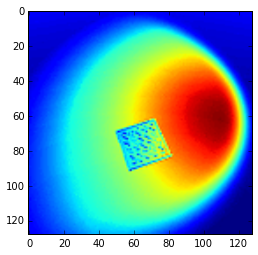

True Block ID:  [['11212']]
Predicted Block ID:  3021
Confidence:  0.339927


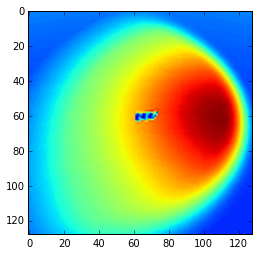

True Block ID:  [['3832']]
Predicted Block ID:  3832
Confidence:  0.257306


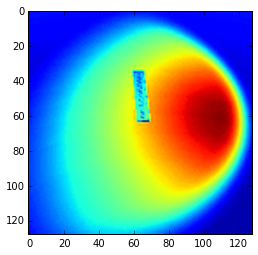

True Block ID:  [['41539']]
Predicted Block ID:  41539
Confidence:  0.809166


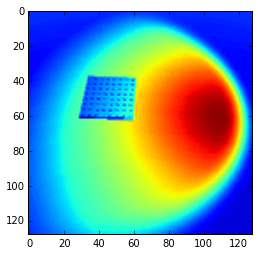

True Block ID:  [['3623']]
Predicted Block ID:  3623
Confidence:  0.501228


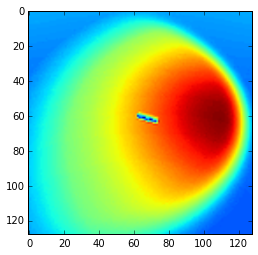

True Block ID:  [['3027']]
Predicted Block ID:  3027
Confidence:  0.646479


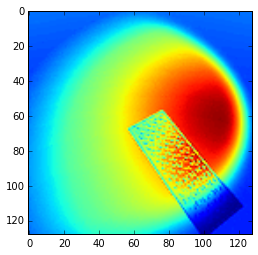

True Block ID:  [['11212']]
Predicted Block ID:  3021
Confidence:  0.42345


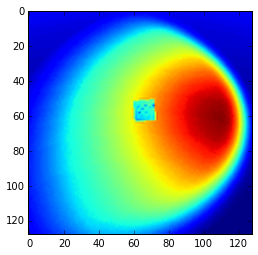

True Block ID:  [['3031']]
Predicted Block ID:  3031
Confidence:  0.855631


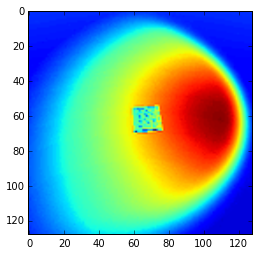

True Block ID:  [['3460']]
Predicted Block ID:  3460
Confidence:  0.535631


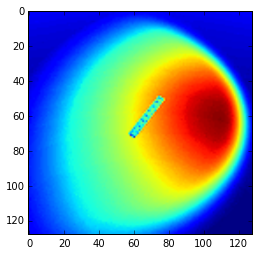

True Block ID:  [['3456']]
Predicted Block ID:  3456
Confidence:  0.433997


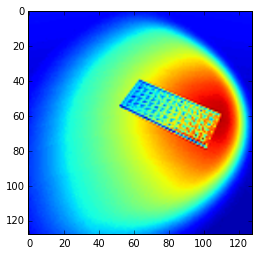

True Block ID:  [['3958']]
Predicted Block ID:  3032
Confidence:  0.379345


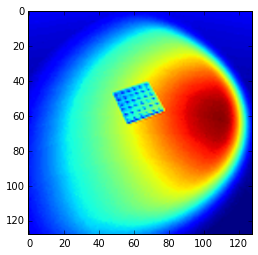

True Block ID:  [['3036']]
Predicted Block ID:  3036
Confidence:  0.192189


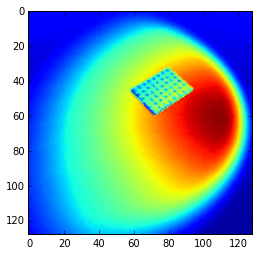

True Block ID:  [['3036']]
Predicted Block ID:  3036
Confidence:  0.367068


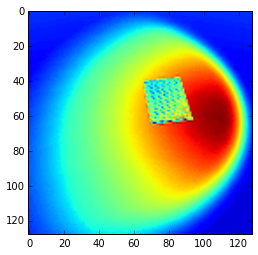

True Block ID:  [['3027']]
Predicted Block ID:  3027
Confidence:  0.412705


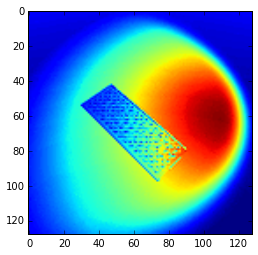

True Block ID:  [['3623']]
Predicted Block ID:  3023
Confidence:  0.426823


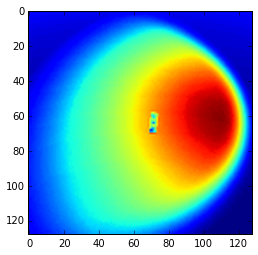

True Block ID:  [['3958']]
Predicted Block ID:  3032
Confidence:  0.188044


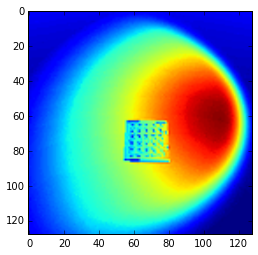

True Block ID:  [['3623']]
Predicted Block ID:  3023
Confidence:  0.493906


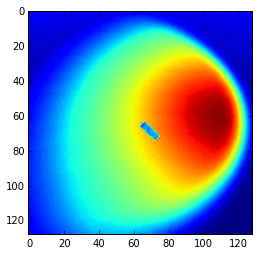

True Block ID:  [['3020']]
Predicted Block ID:  3020
Confidence:  0.422851


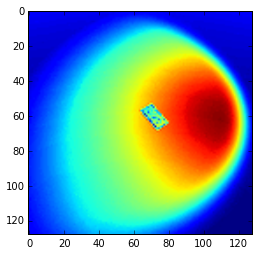

True Block ID:  [['11212']]
Predicted Block ID:  11212
Confidence:  0.368375


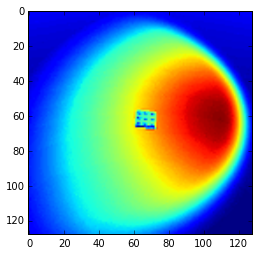

True Block ID:  [['3623']]
Predicted Block ID:  3023
Confidence:  0.50068


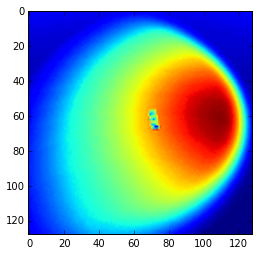

True Block ID:  [['3032']]
Predicted Block ID:  3031
Confidence:  0.456323


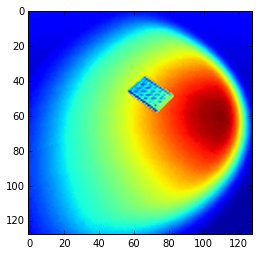

True Block ID:  [['30008']]
Predicted Block ID:  30008
Confidence:  0.93832


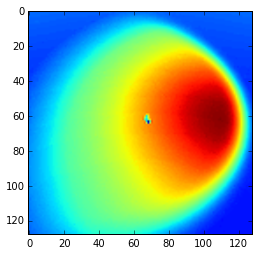

True Block ID:  [['3666']]
Predicted Block ID:  3666
Confidence:  0.49002


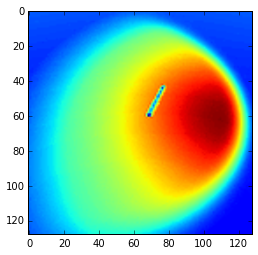

True Block ID:  [['3033']]
Predicted Block ID:  3033
Confidence:  0.721846


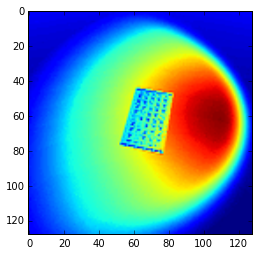

True Block ID:  [['3029']]
Predicted Block ID:  3029
Confidence:  0.35748


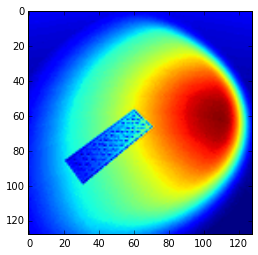

True Block ID:  [['3456']]
Predicted Block ID:  3029
Confidence:  0.181209


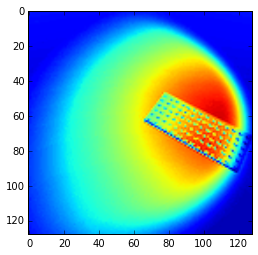

True Block ID:  [['3030']]
Predicted Block ID:  41539
Confidence:  0.318329


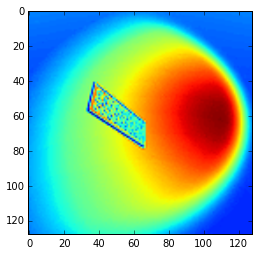

True Block ID:  [['3023']]
Predicted Block ID:  3023
Confidence:  0.497966


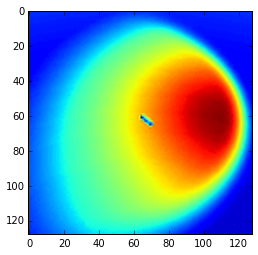

True Block ID:  [['3029']]
Predicted Block ID:  2445
Confidence:  0.42004


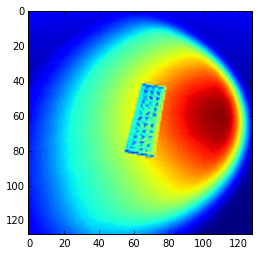

True Block ID:  [['3034']]
Predicted Block ID:  3034
Confidence:  0.339695


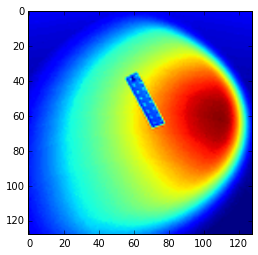

True Block ID:  [['3710']]
Predicted Block ID:  3710
Confidence:  0.562275


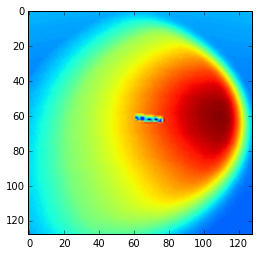

True Block ID:  [['3034']]
Predicted Block ID:  3795
Confidence:  0.317558


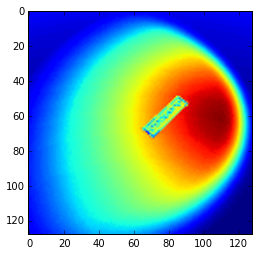

In [94]:
# Visualize a set of test predictions

num_images = 50
image_set = np.random.randint(0, X_train.shape[0], num_images)
#image_set = range(1000,1010)
print(image_set.shape)
n = 0

for image in image_set:
    itemindex = np.where(Y_train[image]==1)
    print("True Block ID: ", le.inverse_transform(itemindex))
    prediction = model.predict(X_train[image_set,:,:,:],batch_size=2,verbose=False)
    print("Predicted Block ID: ", le.inverse_transform(np.argmax(prediction[n])))
    print("Confidence: ", np.amax(prediction[n]))
    n = n+1
    plt.imshow(X_train[image,:,:,0])
    plt.show()


In [96]:
# Generate some statistics on prediction success rates
success = np.zeros(Y_val.shape[1])
num = np.zeros(Y_val.shape[1])
confidence = np.zeros(Y_val.shape[1])
prediction = model.predict(X_val[range(0,Y_val.shape[0]),:,:,:],batch_size=5,verbose=True)

for image in range(0,Y_val.shape[0]):
    itemindex = np.where(Y_val[image]==1)[0]

    # Get count of items in the dataset
    num[itemindex] += 1
    
    # Check the total number of correct predictions
    truth = le.inverse_transform(itemindex[0])
    model_out = le.inverse_transform(np.argmax(prediction[image]))
    if truth == model_out:
        success[itemindex] += 1
        # Compile total sum of confidences
        confidence[itemindex] += np.amax(prediction[image])

success_rate = np.divide(success,num)
confidence_rate = np.divide(confidence,num)
for i in range(0,Y_val.shape[1]):
    print("Success Rate:", le.inverse_transform(i), 100*round(success_rate[i],3))
for i in range(0,Y_val.shape[1]):
    print("Mean Correct Confidence:", le.inverse_transform(i), 100*round(confidence_rate[i],3))
for i in range(0,Y_val.shape[1]):
    print("Number of Samples:", le.inverse_transform(i), num[i])

1335/1335 [==============================] - 38s    
Success Rate: 11212 31.7
Success Rate: 2445 60.0
Success Rate: 30008 92.7
Success Rate: 3020 54.8
Success Rate: 3021 71.9
Success Rate: 3023 54.0
Success Rate: 3027 54.0
Success Rate: 3028 35.1
Success Rate: 3029 72.7
Success Rate: 3030 32.1
Success Rate: 3031 51.1
Success Rate: 3032 20.8
Success Rate: 3033 41.7
Success Rate: 3034 64.4
Success Rate: 3035 65.9
Success Rate: 3036 35.8
Success Rate: 3456 44.6
Success Rate: 3460 59.1
Success Rate: 3623 29.3
Success Rate: 3666 56.9
Success Rate: 3710 56.8
Success Rate: 3795 45.6
Success Rate: 3832 68.2
Success Rate: 3958 48.1
Success Rate: 41539 57.8
Success Rate: 4282 75.0
Success Rate: 4477 57.9
Mean Correct Confidence: 11212 11.1
Mean Correct Confidence: 2445 31.3
Mean Correct Confidence: 30008 79.8
Mean Correct Confidence: 3020 20.1
Mean Correct Confidence: 3021 28.9
Mean Correct Confidence: 3023 25.4
Mean Correct Confidence: 3027 31.4
Mean Correct Confidence: 3028 15.7
Mean Correct C

(2, 128, 128, 1)
Prediction: 11212
Confidence: 0.612045


<function matplotlib.pyplot.show>

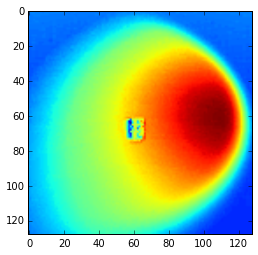

In [603]:
# test_brick_images = np.zeros([img_rows,img_cols])
# test_brick = misc.imread('/Users/ckruse/Downloads/hybrid_brick.jpg')
# test_brick = rgb2gray(test_brick)
# test_brick = np.rollaxis(test_brick, 0,0)
# test_image = np.dstack((test_brick_images, test_brick))
# test_brick_images = np.dstack((test_brick_images, test_brick))
# #test_brick_images = np.delete(test_brick_images,0,axis=2)
# test_brick_images = np.expand_dims(test_brick_images, axis=3)
# test_brick_images = np.rollaxis(test_brick_images,2,0)
# print(test_brick_images.shape)
# print('Prediction:',le.inverse_transform(np.argmax(model.predict(test_brick_images,batch_size=1,verbose=False)[1])))
# print('Confidence:', np.amax(model.predict(test_brick_images,batch_size=1,verbose=False)[1]))

# plt.imshow(test_brick)
# plt.show


[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


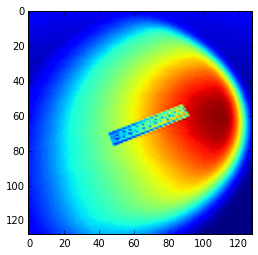

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


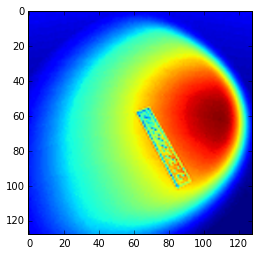

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


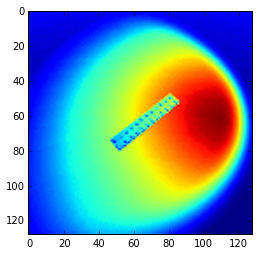

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


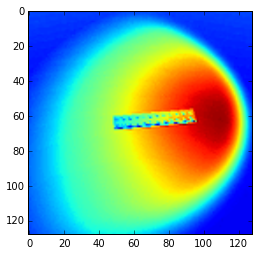

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


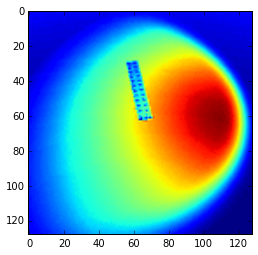

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


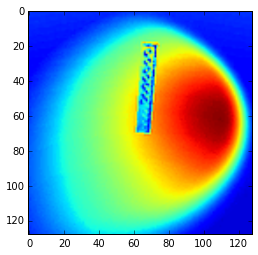

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


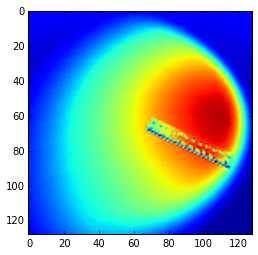

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


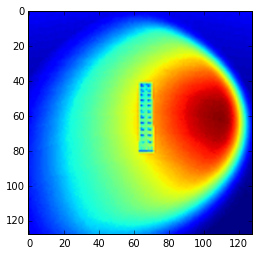

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


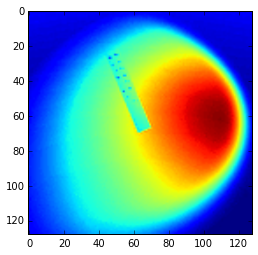

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.]
(9427, 128, 128, 1)
[['2445']]
(128, 128)


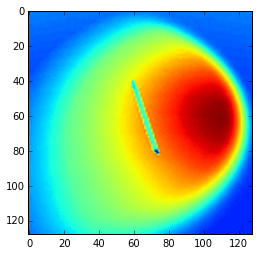

In [5]:

# for a in range(750,760):
#     print(Y_train[a])
#     print(X_train.shape)
#     itemindex = np.where(Y_train[a]==1)
#     print(le.inverse_transform(itemindex))
#     print(images[:,:,a].shape)
#     plt.imshow(images[:,:,a])
#     plt.show()


54 127


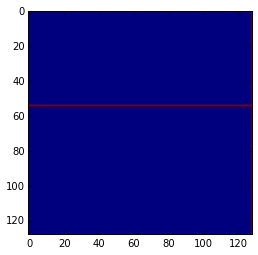

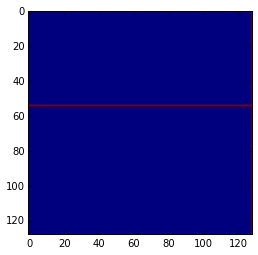

In [35]:
# img_num = 100
# std_x = np.zeros(len(images[:,0,img_num]))
# std_y = np.zeros(len(images[:,0,img_num]))
# for i in range(0,len(images[:,0,img_num])):
#     std_x[i] = np.std(images[i,:,img_num])
# for j in range(0,len(images[0,:,img_num])):
#     std_y[i] = np.std(images[:,j,img_num])

# max_x = np.argmax(std_x)
# max_y = np.argmax(std_y)
# print(max_x, max_y)
# test_img = images[:,:,img_num]
# test_img[max_x,:] = 255
# test_img[:,max_y] = 255
# plt.imshow(test_img[:,:])
# plt.show()
# plt.imshow(images[:,:,img_num])
# plt.show()

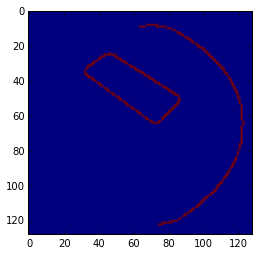

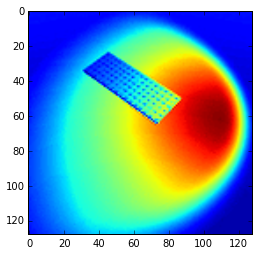

In [47]:
# from skimage.feature import blob_dog, blob_log, blob_doh
# from skimage.color import rgb2gray
# from skimage import feature

# img_num = 3000
# edges = feature.canny(images[:,:,img_num],sigma=2)

# plt.imshow(edges)
# plt.show()
# plt.imshow(images[:,:,img_num])
# plt.show()

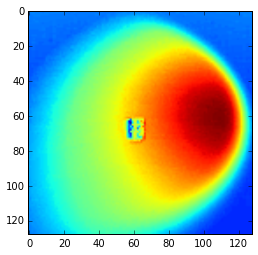

(128, 128)
[array([[[  0,   0]],

       [[  0, 127]],

       [[127, 127]],

       [[127,   0]]], dtype=int32)]
0 0 128 128


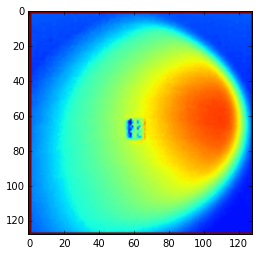

In [88]:
# import cv2
# import math
# im = cv2.imread('/Users/ckruse/Downloads/hybrid_brick.jpg',0)
# plt.imshow(im)
# plt.show()
# print(im.shape)
# im2, contours, hierarchy = cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# print(contours)
# try: hierarchy = hierarchy[0]
# except: hierarchy = []
# height, width = im.shape
# min_x, min_y = width, height
# max_x = max_y = 0

# # computes the bounding box for the contour, and draws it on the frame,
# for contour, hier in zip(contours, hierarchy):
#     (x,y,w,h) = cv2.boundingRect(contour)
#     print(x,y,w,h)
#     min_x, max_x = min(x, min_x), max(x+w, max_x)
#     min_y, max_y = min(y, min_y), max(y+h, max_y)
#     if w > 10 and h > 10:
#         cv2.rectangle(im, (x,y), (x+w,y+h), (255, 0, 0), 2)

# if max_x - min_x > 0 and max_y - min_y > 0:
#     cv2.rectangle(im, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

# plt.imshow(im)
# plt.show()

In [252]:
# im = cv2.imread('/Users/ckruse/Documents/Unity/Lego Sim II/screenshots/3027 (2017-03-19_10-21-057211).png',0)

# thresh_med = int(np.median(im))
# thresh_med = 110
# ret,thresh = cv2.threshold(im,thresh_med,255,0)
# for i in range(0,len(thresh)):
#     for j in range(0,len(thresh)):
#         if min(thresh[i][:]) == 0:
#             if min(thresh[:][j]) == 0:
#                 bounds_y = [i,j]
#                 break
# for i in range(0,len(thresh)):
#     for j in range(0,len(thresh)):
#         if min(thresh[:][j]) == 0:
#             if min(thresh[i][:]) == 0:
#                 bounds_x = [i,j]
#                 break
# print(bounds_x,bounds_y)
# im3,contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# plt.imshow(im3)
# plt.show()
# plt.imshow(im,cmap='Greys_r')
# #plt.imshow(im3,cmap='Greys_r')
# x = []
# y = []
# w = []
# h = []
# for i in range(0, len(contours)):
#     if (i % 2 == 0):
#        cnt = contours[i]

#        #mask = np.zeros(im2.shape,np.uint8)
#        #cv2.drawContours(mask,[cnt],0,255,-1)
#        x.append(cv2.boundingRect(cnt)[0])
#        y.append(cv2.boundingRect(cnt)[1])
#        w.append(cv2.boundingRect(cnt)[2])
#        h.append(cv2.boundingRect(cnt)[3])

# index_max = np.argmax(w)
# cv2.rectangle(im,(min_xy[0],min_xy[1]),(min_xy[0]+1,min_xy[0]+1),(0,0,0),2)
# #cv2.rectangle(im,(x[index_max],y[index_max]),(x[index_max]+w[index_max],y[index_max]+h[index_max]),(0,0,0),2)
# plt.imshow(im,cmap='Greys_r')

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [9]:
import cv2

# Import Data

# input image dimensions
img_rows, img_cols = 128, 128
img_channels = 1

#Create main image array
images = np.zeros([img_rows,img_cols])
labels_text = []

#List folders in the root directory
root_path = '/Users/ckruse/Documents/Python/LegoModel/Bricks/'
root_folders = listdir(root_path)

#Load images into image_array by iterating through all the folders in the root directory
for folder in root_folders:
    if isfile(folder) == False:
        print(folder)
        folder_files = listdir("%s%s" % (root_path, folder))
        for brick in folder_files:
            img = cv2.imread("%s%s/%s" % (root_path, folder, brick))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            imagesa = np.dstack((imagesa, img))
            labels_text.append(folder)

imagesa = np.delete(images,0,axis=2)
print(imagesa.shape)
print('done')

11212
2445
30008


KeyboardInterrupt: 

In [39]:
print(X_train.shape)
print(np.max(X_train[3,:,:,:]))


(2714, 128, 128, 1)
0.886275
